In [244]:
import pandas as pd
ginjal = pd.read_csv('/content/kidney_disease-1.csv')

In [245]:
ginjal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [246]:
ginjal.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [247]:
# Mengisi nilai yang kosong dengan median untuk kolom numerik
ginjal.fillna(ginjal.median(), inplace=True)

# Mengisi nilai yang kosong dengan moda untuk kolom kategorikal
for col in ginjal.columns:
    if ginjal[col].dtype == 'object':  # Memeriksa tipe data kolom
        ginjal[col].fillna(ginjal[col].mode()[0], inplace=True)

<ipython-input-247-ca0eb86953f9>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  ginjal.fillna(ginjal.median(), inplace=True)


In [248]:
ginjal.head(10)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,...,38,6000,5.2,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,normal,normal,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,normal,normal,notpresent,notpresent,...,36,9800,5.2,no,no,no,good,no,no,ckd
7,7,24.0,80.0,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [249]:
from sklearn.preprocessing import LabelEncoder
# Label Encoding untuk kolom kategorikal, kecuali kolom "classification"
label_encoder = LabelEncoder()
for col in ginjal.columns:
    if ginjal[col].dtype == 'object' and col != 'classification':
        ginjal[col] = label_encoder.fit_transform(ginjal[col])

In [250]:
ginjal.head(10)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,...,32,72,34,1,4,1,0,0,0,ckd
1,1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,...,26,56,34,0,3,1,0,0,0,ckd
2,2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,...,19,70,34,0,4,1,1,0,1,ckd
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,20,62,19,1,3,1,1,1,1,ckd
4,4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,...,23,68,27,0,3,1,0,0,0,ckd
5,5,60.0,90.0,1.015,3.0,0.0,1,1,0,0,...,27,72,25,1,4,1,0,1,0,ckd
6,6,68.0,70.0,1.010,0.0,0.0,1,1,0,0,...,24,90,34,0,3,1,0,0,0,ckd
7,7,24.0,80.0,1.015,2.0,4.0,1,0,0,0,...,32,64,31,0,4,1,0,1,0,ckd
8,8,52.0,100.0,1.015,3.0,0.0,1,0,1,0,...,21,88,21,1,4,1,0,0,1,ckd
9,9,53.0,90.0,1.020,2.0,0.0,0,0,1,0,...,17,18,17,1,4,1,1,0,1,ckd


In [251]:
#memisakhan atribut dengan label dimana x itu atribut dan y itu label
X = ginjal.drop(['id', 'classification'], axis=1)
y = ginjal['classification']

#membagi dataset menjadi data latih dan data uji
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=12)

In [252]:
from sklearn.tree import DecisionTreeClassifier

#membuat model decision tree
tree_model= DecisionTreeClassifier()

#melatih model menggunakan data latih dengan fungsi fit
tree_model= tree_model.fit(X_train,y_train)

In [253]:
#evaluasi model untuk meguji seberapa baik model yang digunakan dan akurasi

from sklearn.metrics import accuracy_score

y_pred =  tree_model.predict(X_test)

accuracy_score =round(accuracy_score(y_pred, y_test), 3)

print('Accuracy: ',accuracy_score)

Accuracy:  0.962


In [263]:
# Data pasien

single_patient_data1 = {
    'age': 59,
    'bp': 100,
    'sg': 1.015,
    'al': 4,
    'su': 2,
    'rbc': 'normal',
    'pc': 'normal',
    'pcc': 'notpresent',
    'ba': 'notpresent',
    'bgr': 255,
    'bu': 132,
    'sc': 12.8,
    'sod': 135,
    'pot': 5.7,
    'hemo': 7.3,
    'pcv': 20,
    'wc': 9800,
    'rc': 3.9,
    'htn': 'yes',
    'dm': 'yes',
    'cad': 'yes',
    'appet': 'good',
    'pe': 'no',
    'ane': 'yes'
}

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# List fitur yang perlu di-label encode
categorical_features = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']

# Lakukan label encoding untuk setiap fitur kategorikal
for feature in categorical_features:
    single_patient_data1[feature] = label_encoder.fit_transform([single_patient_data1[feature]])[0]

# Prediksi kelas pasien
print(tree_model.predict([list(single_patient_data1.values())])[0])

ckd


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [262]:
# Data pasien

single_patient_data2 = {
    'age': 48,
    'bp': 80,
    'sg': 1.02,
    'al': 1,
    'su': 0,
    'rbc': 'normal',
    'pc': 'normal',
    'pcc': 'notpresent',
    'ba': 'notpresent',
    'bgr': 121,
    'bu': 36,
    'sc': 1.2,
    'sod': 137,
    'pot': 4.4,
    'hemo': 15.4,
    'pcv': 44,
    'wc': 7800,
    'rc': 5.2,
    'htn': 'yes',
    'dm': 'yes',
    'cad': 'no',
    'appet': 'good',
    'pe': 'no',
    'ane': 'no'
}

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# List fitur yang perlu di-label encode
categorical_features = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']

# Lakukan label encoding untuk setiap fitur kategorikal
for feature in categorical_features:
    single_patient_data2[feature] = label_encoder.fit_transform([single_patient_data2[feature]])[0]

# Prediksi kelas pasien
print(tree_model.predict([list(single_patient_data2.values())])[0])

notckd


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


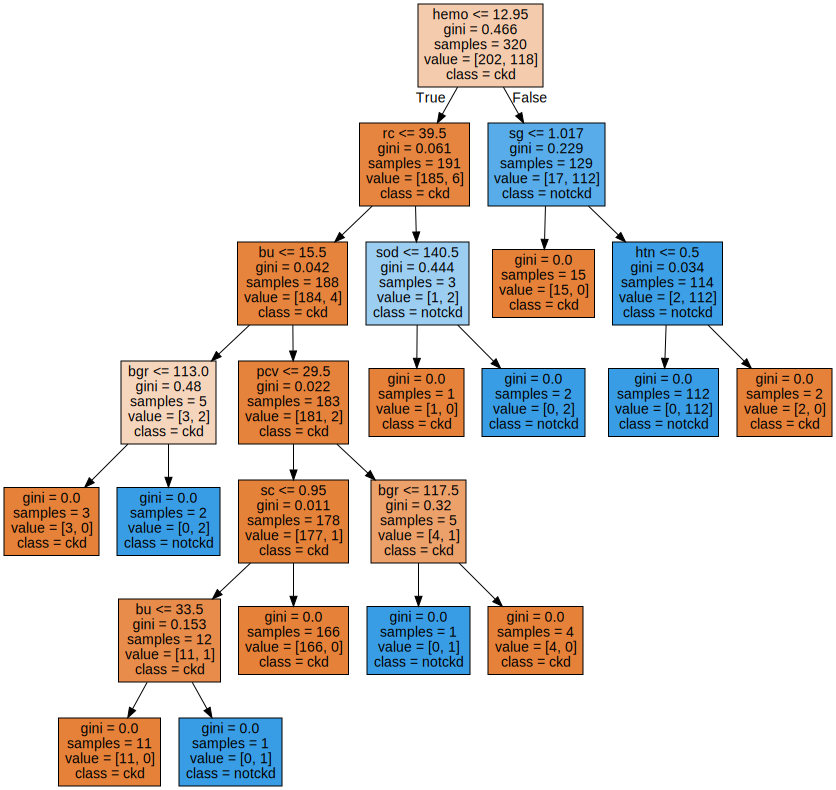

In [264]:
from sklearn.tree import export_graphviz
import graphviz

# Export pohon keputusan ke file DOT
export_graphviz(tree_model, out_file='tree.dot', feature_names=X.columns, class_names=tree_model.classes_, filled=True)

# Membaca file DOT dan membuat objek GraphViz
with open('tree.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)